# Code snippets

A collection of small code snippets that can be helpful for some parts of the lab.

In [1]:
import numpy as np

## Spark

In [2]:
import json
from operator import itemgetter

In [3]:
# Each line can be transformed into a Python dict using `json.loads`.
data = sc.textFile("/ix/ml-20m/movies.txt").map(json.loads)

datum = data.take(1)[0]
print(datum)
print(datum["title"])
print(datum["genres"][2])

{'genres': ['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'], 'movieId': 1, 'title': 'Toy Story (1995)'}
Toy Story (1995)
Children


In [4]:
# `itemgetter` can be useful to extract certain fields.
datum = data.map(itemgetter("movieId", "title")).take(1)[0]

print(datum)

(1, 'Toy Story (1995)')


It is easy to append additional data to an RDD using `union`.

In [5]:
data = sc.textFile("/ix/ml-20m/ratings.txt").map(json.loads)

# `parallelize` transforms a Python list into an RDD.
additional = sc.parallelize([
    {"movieId": 1, "userId": 1, "timestamp": 98765, "rating": 5.0},
    {"movieId": 2, "userId": 1, "timestamp": 98765, "rating": 5.0},
])

# This will simply extend the `data` RDD with the `additional` RDD.
combined = data.union(additional)

The method `join` can be used to "merge" two RDDs based on the key.

In [6]:
ratings1 = sc.parallelize([
        (("user1", "movie7"), 3),
        (("user2", "movie4"), 4),
    ])
ratings2 = sc.parallelize([
        (("user1", "movie7"), 2.75),
        (("user2", "movie4"), 4.17),
    ])

joined = ratings1.join(ratings2).collect()

for key, val in joined:
    print(key, val)

('user2', 'movie4') (4, 4.17)
('user1', 'movie7') (3, 2.75)


## Visualization

Matplotlib can be used for simple static plots.

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

Text(0.5,1,'Sorted')

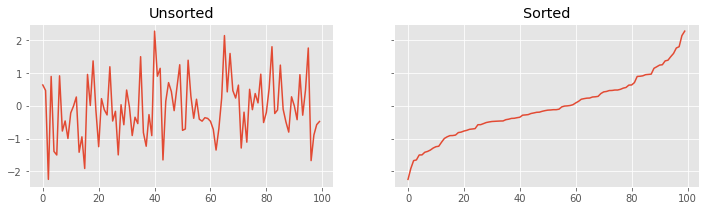

In [8]:
ys1 = np.random.randn(100)
ys2 = np.sort(ys1)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 3), sharey=True)
ax1.plot(ys1)
ax1.set_title("Unsorted")
ax2.plot(ys2)
ax2.set_title("Sorted")

Bokeh is another library that can be used for interactive plots.

In [9]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure, ColumnDataSource
from bokeh.models import HoverTool, ResetTool, PanTool, WheelZoomTool, SaveTool
output_notebook()

Loading BokehJS ...

In [10]:
data = (
    (0.7, -0.3, "car", 0.1, 0),
    (-0.1, -0.5, "train", 0.3, 1),
    (-0.5, 0.7, "plane", 0.6, 2),
    (0.2, 0.2, "bike", 0.9, 3),
)

In [11]:
# Continuous colors
from matplotlib.colors import rgb2hex 
cmap = plt.get_cmap('viridis')
def val2rgb(val):
    return rgb2hex(cmap(val)[:3])

source = ColumnDataSource(
    data={
        "x": [x[0] for x in data],
        "y": [x[1] for x in data],
        "name": [x[2] for x in data],
        "color": [val2rgb(x[3]) for x in data],
    })

hover = HoverTool(
    tooltips=[
        ("Name", "@name"),
    ])
tools = [hover, ResetTool(), PanTool(), WheelZoomTool(), SaveTool()]

p = figure(plot_width=960, plot_height=360, tools=tools, title="Mouse over the dots")
p.circle("x", "y", source=source, size=20, color="color", alpha=0.5)
show(p, notebook_handle=True)

In [12]:
[val2rgb(x[3]) for x in data]

['#482475', '#355f8d', '#22a884', '#bddf26']

In [13]:
# Categorial colors
from bokeh.palettes import Dark2_8

source = ColumnDataSource(
    data={
        "x": [x[0] for x in data],
        "y": [x[1] for x in data],
        "name": [x[2] for x in data],
        "color": [Dark2_8[x[4]] for x in data],
    })

hover = HoverTool(
    tooltips=[
        ("Name", "@name"),
    ])
tools = [hover, ResetTool(), PanTool(), WheelZoomTool(), SaveTool()]

p = figure(plot_width=960, plot_height=360, tools=tools, title="Mouse over the dots")
p.circle("x", "y", source=source, size=20, color="color", alpha=0.5)
show(p, notebook_handle=True)

## Serialization

The `pickle` module can be used to read and write Python objects from / to disk.

In [14]:
import pickle

In [15]:
# Reading an object from disk.
with open("selected-movies.pickle", "rb") as f:
    movies = pickle.load(f, encoding="utf-8")
    
for movie in movies[:3]:
    print(movie)

(780, 'Independence Day (a.k.a. ID4) (1996)', 0.6)
(5349, 'Spider-Man (2002)', 0.89)
(2571, 'Matrix, The (1999)', 0.87)


In [16]:
# Writing an object to disk.
data = {"a": np.arange(10), "b": np.random.randn(10)}
with open("sample-file.pickle", "wb") as f:
    pickle.dump(data, f)